


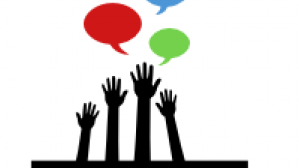







# GRIPJAN 23 - Task 1 - Prediction using Unspervised ML - Cluster Model

#  The Sparks Foundation

# Data Science and Business Analytics Internship

#  Predict the optimum number of cluster and represent it visually

# Mohammad Saim Khan

# Import the necessary libraries

In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

# Read the data as a data frame

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
# Displaying top 5 Rows 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Samples from each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


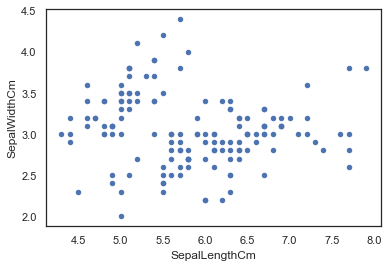

In [6]:
# The pandas plot extenstion can be used to make a scatterplot
# Display your plot with plt.show

df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

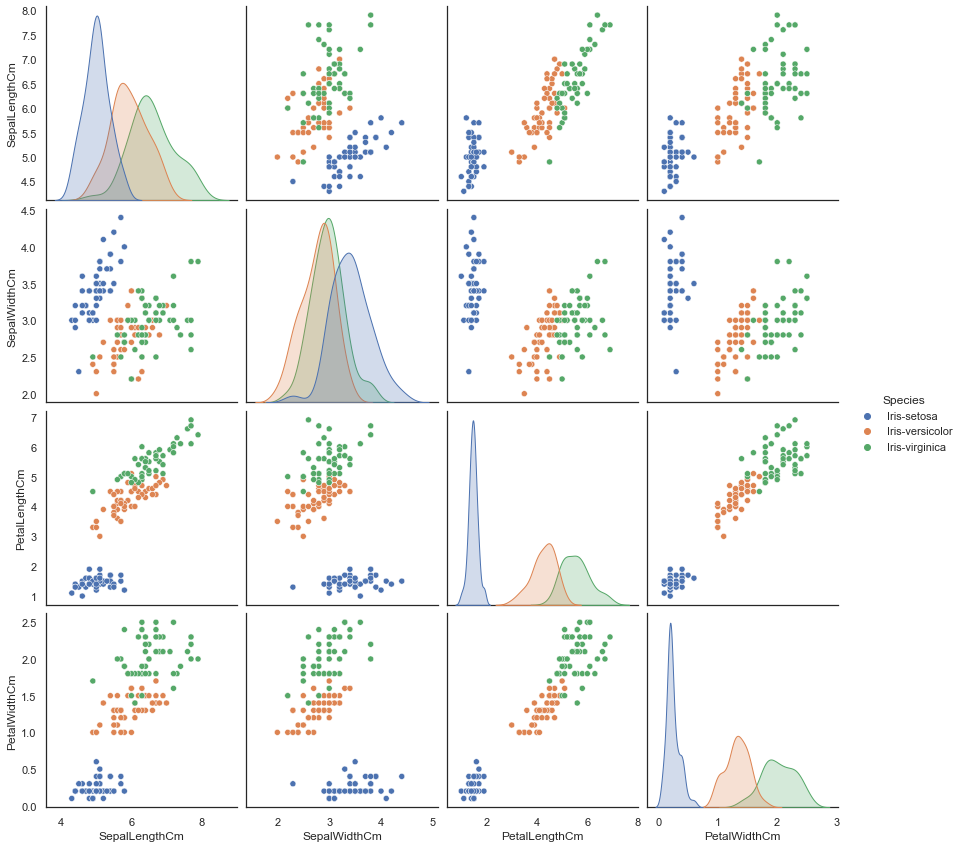

In [19]:
#Use pairplot to analyze the relationship between species for all characteristic combinations. 
# An observable trend shows a close relationship between two of the species

sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)
plt.show()

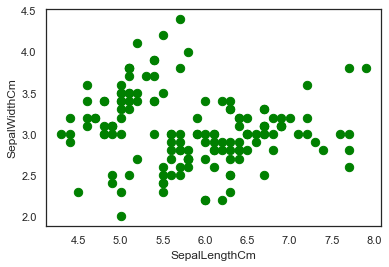

In [8]:
#To change color and size, add the following:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="green",s=70 )
plt.show()

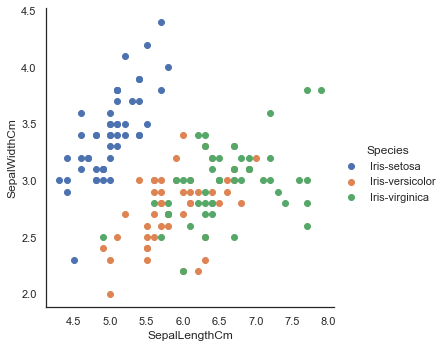

In [10]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

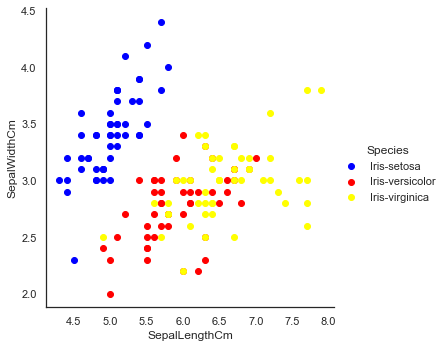

In [12]:
# Change the colors of the data points in the graph above
# Assign the colors a variable name, and insert hue_kws="variable name" as shown.
KS = {'color': ['blue', 'red', 'yellow']}
sns.FacetGrid(df, hue_kws=KS, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

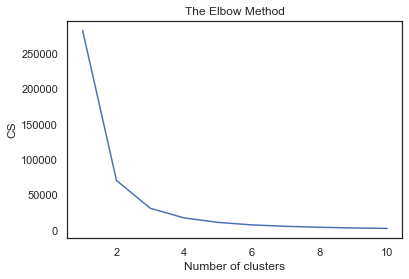

In [22]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()